# Car4u Project

## Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

## Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

## Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

### Data Dictionary

* S.No.: Serial number
* Name: Name of the car which includes brand name and model name
* Location: Location in which the car is being sold or is available for purchase (cities)
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic/Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in bhp
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
* Price: The price of the used car in INR Lakhs


## 1. Data Load, Preprocessing and Exploratory Data Analysis

## Data Load

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
!pip install nb_black

%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

  Using cached nb_black-1.0.7.tar.gz (4.8 kB)
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5298 sha256=1e5ee98c8ee3b248e69977dad1479d5b7cf020d4e5ded4498fd521b750f5d4a5
  Stored in directory: c:\users\smatdata2\appdata\local\pip\cache\wheels\25\9d\fc\6312e3d8a66c164cc7f9d80bc66cc25de03a362a30b9f84aa3
Successfully built nb-black


<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
df = pd.read_csv("used_cars_data.csv", index_col=0)

<IPython.core.display.Javascript object>

In [3]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 7253 rows and 13 columns.


<IPython.core.display.Javascript object>

In [4]:
# Viewing a sample of the data
df.sample(n=10, random_state=1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50


<IPython.core.display.Javascript object>

Looking at these ten random random columns, it can be observed that all the features are relevant and there is no nened to be dropped now. However, some further Data preprocessing needs to be carried out:

* The car model can be extracted from the Name column
* It is not yet clear if the units in Mileage, Engine, Power and New_Price are consistent
* The columns Mileage, Engine, Power and New_Price contain numerical information but are currently text


In [5]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


<IPython.core.display.Javascript object>

* Year, Kilometers_Driven, Seats and Price are correctly in the Numerical Format
* Some coulmns contained missing data that will beed to be further Queried

In [6]:
# checking for missing values
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

* New_Price contains the highest number of missing data while Mileage contains the lowest number of missing data
* Power, Engine and Seats contain a moderate number of missing values
* Mileage can be safely dropped while the other columns have to be carefully examined before being worked upon

In [7]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7078,385,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

* There are 11 unique locations examined. These might need to be grouped in respective geographical regions
* There are over 2000 car names. This number could significantly drop when just the car brand is extracted and Analysed
* The Data for Price is highly skewed to the right
* The Data is showing cars produced between 1996 and 2019
* There are cars without seats (0 seats). This seems to be an outlier in the data
* The maximum car seat number is 10

## First Stage Preprocessing

* This is where Data is preprocessed for the sake of an Exploratory Data Analysis.
* No Actions will be taken here such as imputting the missing values

In [8]:
# let's create a copy of the data to avoid any changes to original data
data = df.copy()

<IPython.core.display.Javascript object>

In [9]:
# checking for duplicate value count in the data
data.duplicated().sum()

1

<IPython.core.display.Javascript object>

In [10]:
# checking for duplicate values in the data
data[data.duplicated(keep=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
6498,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,NaN
6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,NaN


<IPython.core.display.Javascript object>

* The Data contains one duplicate value.
* This row will be dropped before further proceeding with the first stage of data pre-processing

In [11]:
# Dropping the Duplicate row and confirmation of new duplicated row count
data.drop_duplicates(keep='first', inplace=True)
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

The dataset now contains no duplicate rows

In [12]:
# Creation of a function to Extract car brand from Car name

def car_name_to_brand(carname):
  return carname.split(' ')[0]

<IPython.core.display.Javascript object>

In [13]:
# Applying the function to extract the car brand
data['Brand'] = data.Name.apply(car_name_to_brand)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi


<IPython.core.display.Javascript object>

In [14]:
# Comparison of the uniqueness of the Car names and brand

print(f"There are {len(data.Name.unique())} unique cars and {len(data.Brand.unique())} car brands.")

There are 2041 unique cars and 33 car brands.


<IPython.core.display.Javascript object>

In [15]:
# We have previously established that owner type does not have missing values
# Evaluation of unique owner values

data.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

<IPython.core.display.Javascript object>

There are only four variants of the owner type.

It will be converted from string to an integer (Ordinal value)

In [16]:
# Ceation of function to convert the owner type to ordinal values (1 - 4)

def ownertype(owner):
  if owner == 'First':
    return 1
  elif owner == 'Second':
    return 2
  elif owner == 'Third':
    return 3
  else:
    return 4

<IPython.core.display.Javascript object>

In [17]:
# Conversion of owner_type to numerical
data['Owner_Type'] = df.Owner_Type.apply(ownertype)


data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi


<IPython.core.display.Javascript object>

In [18]:
# Check for rows that are not string values
data[data.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
S.No.,,,,,,,,,,,,,,
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,1,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00,Mahindra
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,1,NaN,1798 CC,73 bhp,5.0,NaN,12.75,Toyota


<IPython.core.display.Javascript object>

All missing values came from Electric cars.

The entire data sent for electric cars will be inspected to see if this trend is exclusive to electric cars

In [19]:
# Check out the Electric Cars Dataframe
data[data.Fuel_Type == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
S.No.,,,,,,,,,,,,,,
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,1,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00,Mahindra
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,1,NaN,1798 CC,73 bhp,5.0,NaN,12.75,Toyota


<IPython.core.display.Javascript object>

* Our Assumption has beeen confirmed that only 2 electric cars have missing mileage
* This data can be safely dropped

In [20]:
# Drop null values from the Mileage
data.dropna(subset=['Mileage'], axis = 0, inplace=True)

<IPython.core.display.Javascript object>

In [21]:
# Evaluation of the Mileage unit
list(set([item.split(' ')[1] for item in data.Mileage]))

['km/kg', 'kmpl']

<IPython.core.display.Javascript object>

Mileage would be converted from kmpl to km/kg using the density (kg/l)

In [22]:
# Evaluation of unique fuel type
data.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

<IPython.core.display.Javascript object>

* Fuel types include 'CNG', 'Diesel', 'Petrol', 'LPG'
* [Density of CNG](https://www.aqua-calc.com/page/density-table/substance/compressed-blank-natural-blank-gas) is 0.13kg/L
* [Density of Diesel](https://www.sciencedirect.com/topics/engineering/diesel-fuel#:~:text=The%20density%20of%20petroleum%20diesel,0.70%E2%80%930.75%20kg%2Fl.) is 0.85kg/L
* [Density of Petrol](https://en.wikipedia.org/wiki/Gasoline#:~:text=in%20Hiroshima%2C%20Japan-,Density,according%20to%20its%20actual%20density.) is 0.755kg/L
* [Density of LPG](https://www.total.com.bd/lpg-consumers/about-lpg/lpg-specifications) is 0.555kg/L

These values will be used to convert from kmpl to km/kg

[km/kg] = [kmpl] / density

In [23]:
# Loop to convert from kmpl to km/kg
# Fuel types include 'CNG', 'Diesel', 'Petrol', 'LPG'

Correct_Mileage = []

for item in np.array(data[['Fuel_Type', 'Mileage']]):
    if item[1].endswith('kmpl'):
        if item[0] == 'CNG':
            Correct_Mileage.append(float(item[1].split(' ')[0]) / 0.13)
            
        elif item[0] == 'Diesel':
            Correct_Mileage.append(float(item[1].split(' ')[0]) / 0.85)

        elif item[0] == 'Petrol':
            Correct_Mileage.append(float(item[1].split(' ')[0]) / 0.755)

        else:
            Correct_Mileage.append(float(item[1].split(' ')[0]) / 0.555)


    else:
        Correct_Mileage.append(float(item[1].split(' ')[0]))


pd.DataFrame({
    'Fuel_Type': list(data.Fuel_Type),
    'Mileage' : list(data.Mileage),
    'Correct_Mileage' : Correct_Mileage}).sample(n=10, random_state=1)

,Fuel_Type,Mileage,Correct_Mileage
5042,Diesel,11.5 kmpl,13.529412
7024,Diesel,20.0 kmpl,23.529412
2781,Petrol,19.7 kmpl,26.092715
3658,Diesel,24.4 kmpl,28.705882
2868,Diesel,23.4 kmpl,27.529412
3780,Diesel,11.68 kmpl,13.741176
186,Diesel,13.0 kmpl,15.294118
305,Diesel,17.68 kmpl,20.800000
3203,Petrol,18.0 kmpl,23.841060
3451,Petrol,18.9 kmpl,25.033113


<IPython.core.display.Javascript object>

In [24]:
# Add the Converted Mileage to the Data Frame
data['Mileage'] = Correct_Mileage

<IPython.core.display.Javascript object>

In [25]:
# Evaluation of the units of columns assumed to have single units

Single_Column = ['Engine', 'Power', 'New_Price']

for col in Single_Column:
    units = list(set([item.split(' ')[1] for item in data[col][data[col].notnull()]]))
    print(f"{col}: {units}")

Engine: ['CC']
Power: ['bhp']
New_Price: ['Lakh', 'Cr']


<IPython.core.display.Javascript object>

* Engine and Power have uniform units and can be easily transformed
* New_Price does not have uniform units and needs conversion during transformation

In [26]:
# Comparison of the non-empty New price and Current price columns

data[['New_Price', 'Price']][data['New_Price'].notnull()].sample(n=10, random_state=1)

,New_Price,Price
S.No.,,
5172,23.37 Lakh,10.77
4612,8.68 Lakh,5.43
4523,34.6 Lakh,16.42
3648,10.1 Lakh,6.95
2445,63.71 Lakh,21.75
1842,6.32 Lakh,5.53
5313,67.67 Lakh,35.50
6586,27.56 Lakh,NaN
6062,11.89 Lakh,NaN


<IPython.core.display.Javascript object>

In [27]:
# Function to convert Column with just one unit to number
def col1_to_num(value):
    """This function takes in a string representing a Columnn.
     with a single unit. For example, '10 CC' becomes 10.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(value, str):  # checks if `value` is a string    
        return float(value.split(' ')[0])
    else:
        return np.nan


# Function to convert New Price Column multiple units ['Cr', 'Lakh']
def col2_to_num(value):
    """This function takes in a string representing a Columnn and
    adds the right multiplier. For example, '10 Cr' becomes 1000.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(value, str):  # checks if `value` is a string    
        multiplier = 1  # handles Lakh
        if value.endswith('Cr'):
            multiplier = 100
        return float(value.replace('Cr', '').replace('Lakh', '')) * multiplier 
    
    else:
        return np.nan


col_transforms = {
    'Engine': col1_to_num,
    'Power': col1_to_num,
    'New_Price': col2_to_num
}

# k is the key, so the column name here
# v is the value, which a function
for k,v in col_transforms.items():
    data[k] = data[k].map(v)               

<IPython.core.display.Javascript object>

In [28]:
# View Data Sample after first batch of preprocessing

data.sample(n=5, random_state=1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
S.No.,,,,,,,,,,,,,,
5044,Toyota Fortuner 3.0 Diesel,Chennai,2010,136000,Diesel,Manual,2,13.529412,2982.0,171.0,7.0,NaN,11.00,Toyota
7027,Ford Figo Diesel ZXI,Ahmedabad,2012,79000,Diesel,Manual,1,23.529412,1399.0,68.0,5.0,NaN,NaN,Ford
2781,Maruti Alto LXi,Kolkata,2010,38127,Petrol,Manual,1,26.092715,796.0,46.3,5.0,NaN,1.55,Maruti
3658,Hyundai Xcent 1.1 CRDi Base,Hyderabad,2016,106092,Diesel,Manual,1,28.705882,1120.0,71.0,5.0,NaN,4.40,Hyundai
2868,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,1,27.529412,1248.0,74.0,5.0,NaN,5.75,Maruti


<IPython.core.display.Javascript object>

### Univariate analysis

In [29]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [30]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [31]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand'],
      dtype='object')

<IPython.core.display.Javascript object>

In [32]:
## The Price (Dependent Variable) contains Null values
## This cannot be used for prdiction and must be dropped
print('The number of rows before removing null Prices rows is:', len(data))
data.dropna(subset = ['Price'], axis = 0, inplace=True)
print('The number of rows after removing null Prices rows is:', len(data))

The number of rows before removing null Prices rows is: 7250
The number of rows after removing null Prices rows is: 6017


<IPython.core.display.Javascript object>

In [33]:
## Observation on Name

data.Name.value_counts()

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Swift VDI BSIV                  31
                                       ..
Mahindra Scorpio S10 AT 4WD             1
Hyundai i20 1.2 Era                     1
Toyota Camry W4 (AT)                    1
BMW 5 Series 2013-2017 520d M Sport     1
Mahindra Xylo D4 BSIV                   1
Name: Name, Length: 1874, dtype: int64

<IPython.core.display.Javascript object>

The most popular car is Mahindra XUV500 W8 2WD

In [34]:
## Observation on the Car Brand

data.Brand.value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          271
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Brand, dtype: int64

<IPython.core.display.Javascript object>

The Most popular brand is Maruti           

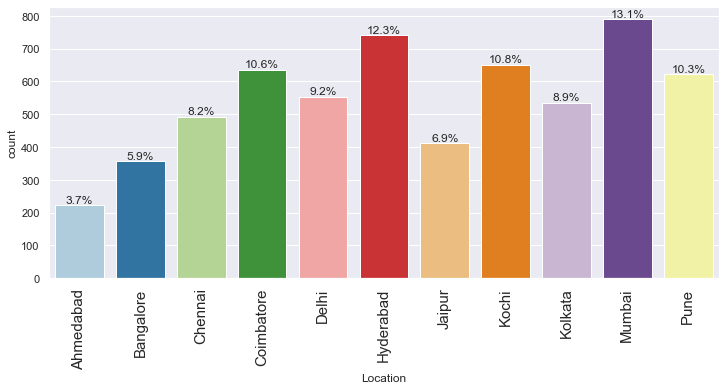

<IPython.core.display.Javascript object>

In [35]:
## Observation on Location

labeled_barplot(data, "Location", perc=True)

* Mumbai is the most populated state represented in the dataset.
* Based on the different states, the Locations can still be further grouped

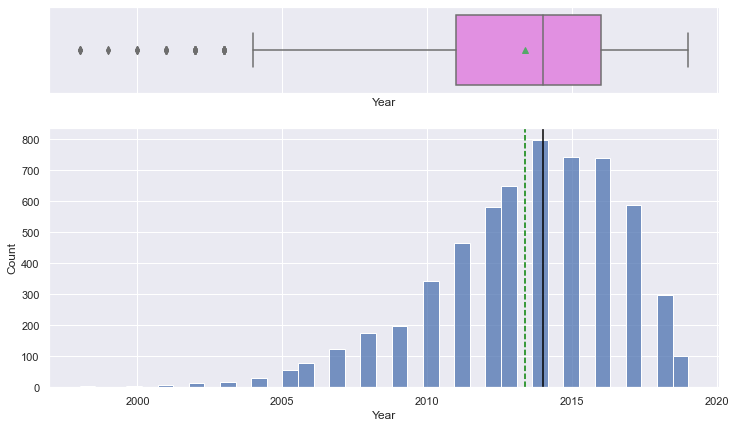

<IPython.core.display.Javascript object>

In [36]:
## Observation on Year
histogram_boxplot(data, "Year")

* The year is skewed to the left
* Very few cars in the dataset were produced before 2005

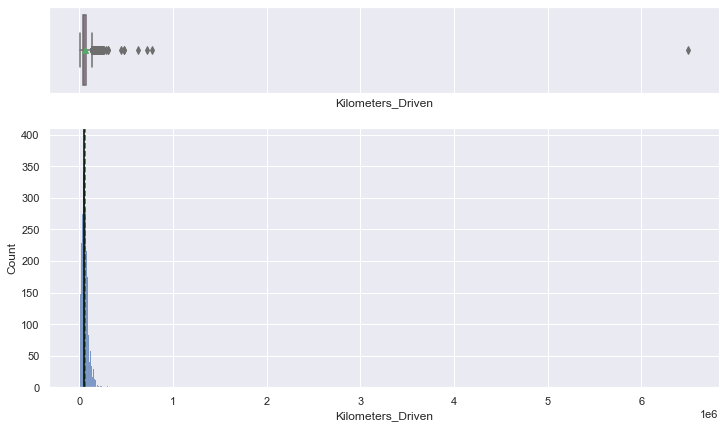

<IPython.core.display.Javascript object>

In [37]:
## Observation on the Kilometers Driven
histogram_boxplot(data, "Kilometers_Driven")

* This data is highly skewed to the right
* The Data contains an extreme point that has skewed the Data

In [38]:
## Querying the Data for Kilometers driven which seems to be highly skewed

data[data.Kilometers_Driven == data.Kilometers_Driven.values.max()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
S.No.,,,,,,,,,,,,,,
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,1,18.788235,2993.0,258.0,5.0,NaN,65.0,BMW


<IPython.core.display.Javascript object>

For the purpose of futher Questioning, we would Query the data to find out what is the general  trend for Cars produced in 2017 with owner tyype 1

In [39]:
## Dataframe of Cars produced in 2017 with owner type 1

data.sort_values(by = 'Kilometers_Driven', ascending=False)[(data.Year == 2017) & (data.Owner_Type == 1)]

C:\Users\SMATDA~1\AppData\Local\Temp/ipykernel_9484/3422748601.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.sort_values(by = 'Kilometers_Driven', ascending=False)[(data.Year == 2017) & (data.Owner_Type == 1)]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
S.No.,,,,,,,,,,,,,,
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,1,18.788235,2993.0,258.00,5.0,NaN,65.00,BMW
1409,Maruti Swift Dzire Tour LDI,Kolkata,2017,148000,Diesel,Manual,1,27.529412,1248.0,74.00,5.0,NaN,4.75,Maruti
2674,Tata Indica V2 eLS,Chennai,2017,129000,Diesel,Manual,1,29.411765,1396.0,69.00,5.0,NaN,3.00,Tata
489,Mercedes-Benz GLS 350d 4MATIC,Pune,2017,129000,Diesel,Automatic,1,12.941176,2987.0,258.00,7.0,100.00,56.00,Mercedes-Benz
5546,Honda Amaze VX i-DTEC,Hyderabad,2017,128000,Diesel,Manual,1,30.352941,1498.0,98.60,5.0,NaN,6.30,Honda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,Maruti Swift DDiS ZDI Plus,Hyderabad,2017,2000,Diesel,Manual,1,33.411765,1248.0,74.00,5.0,NaN,8.20,Maruti
2123,Ford EcoSport 1.5 Ti VCT MT Titanium BE,Mumbai,2017,2000,Petrol,Manual,1,25.006623,1499.0,110.40,5.0,NaN,8.65,Ford
1175,Ford EcoSport 1.5 Ti VCT AT Titanium BE,Kolkata,2017,1800,Petrol,Automatic,1,21.258278,1499.0,110.40,5.0,NaN,11.37,Ford


<IPython.core.display.Javascript object>

It is very clear now that the maximum Kilometer Driven is an outlier after comparing with similar values in the same category of Year and Owner Type

In [40]:
## Drop the outlier from the Dataset
data.drop(data[data.Kilometers_Driven == data.Kilometers_Driven.values.max()].index, inplace=True)

<IPython.core.display.Javascript object>

Here, the outlier data has been dropped for a better Data distribution

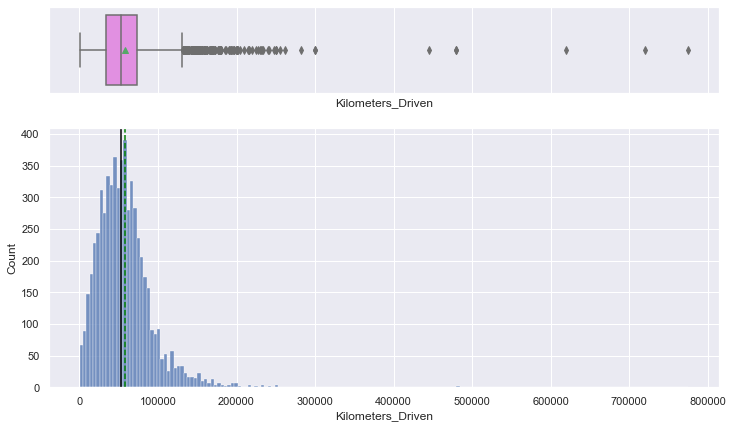

<IPython.core.display.Javascript object>

In [41]:
## The distribution is rexamined again for a realistic understanding
histogram_boxplot(data, "Kilometers_Driven")

* The data is highly skewed to the right
* Only few cars have driven more than 200000
* There are still some extreme data Points
* The large skewness needs to be adjusted using a Log transformation

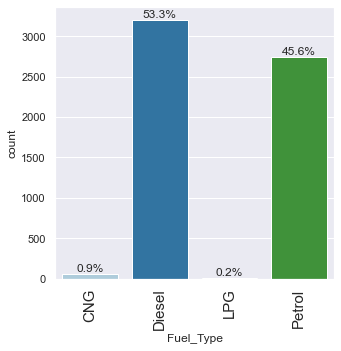

<IPython.core.display.Javascript object>

In [42]:
## Observaton on Fuel Type

labeled_barplot(data, "Fuel_Type", perc=True)

Majority of the cars run on Diesel and Petrol

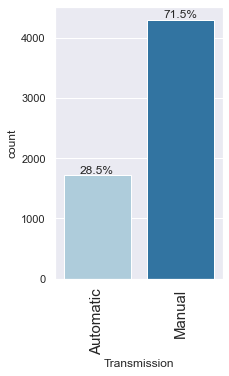

<IPython.core.display.Javascript object>

In [43]:
## Observation on Transmission

labeled_barplot(data, "Transmission", perc=True)

Most of the Cars have manual Transmission

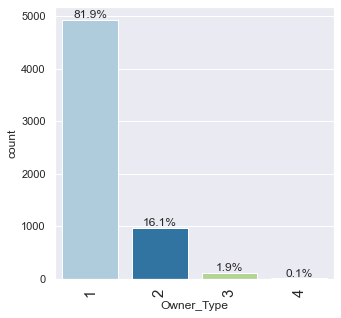

<IPython.core.display.Javascript object>

In [44]:
## Observation on Owner_Type

labeled_barplot(data, "Owner_Type", perc=True)

Majority of the Cars were only used by one person before being put up for Sale

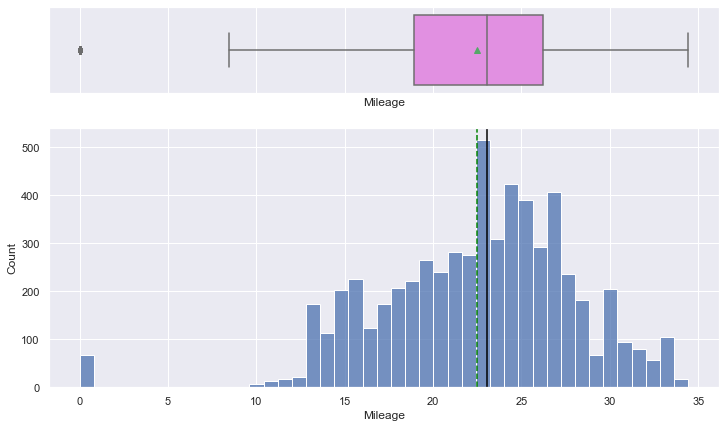

<IPython.core.display.Javascript object>

In [45]:
## Observation on Mileage

histogram_boxplot(data, "Mileage")

The mileage contains outliers which are absurd values. The mileage of a car cannot be 0

In [46]:
# Removal of Mileage outliers
print(f"There are {data.Mileage[data.Mileage == 0].count()} outlier cars without Mileage")
print("\n")
data.drop(data[data.Mileage == data.Mileage.min()].index, inplace=True)
print("Mileage outliers have been removed")


There are 68 outlier cars without Mileage


Mileage outliers have been removed


<IPython.core.display.Javascript object>

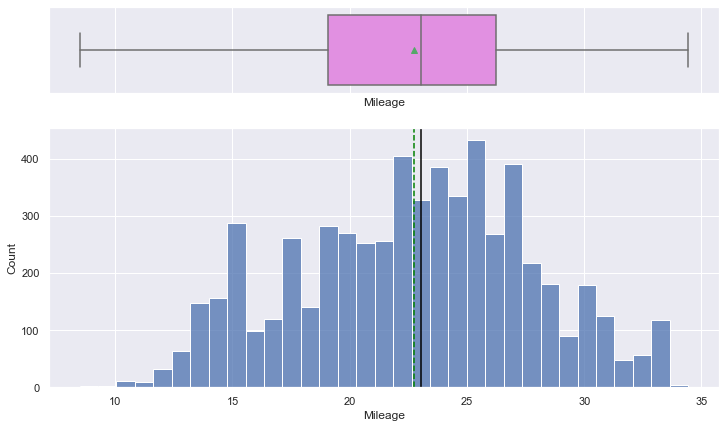

<IPython.core.display.Javascript object>

In [47]:
## Re-Observation of the Mileage

histogram_boxplot(data, "Mileage")

The Mileage Data now has a more uniform distribution

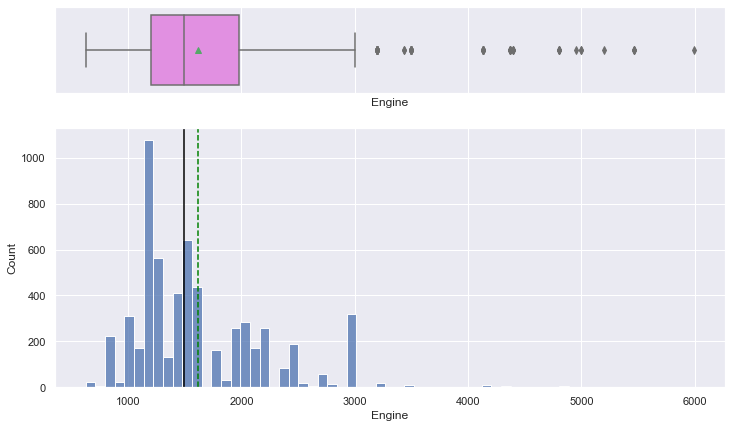

<IPython.core.display.Javascript object>

In [48]:
## Observation on Engine

histogram_boxplot(data, "Engine")

* This Data is skewed to the right
* Although there are outliers in the Dataset, these values are reasonable to be CC. They are associated with Exotic Cars

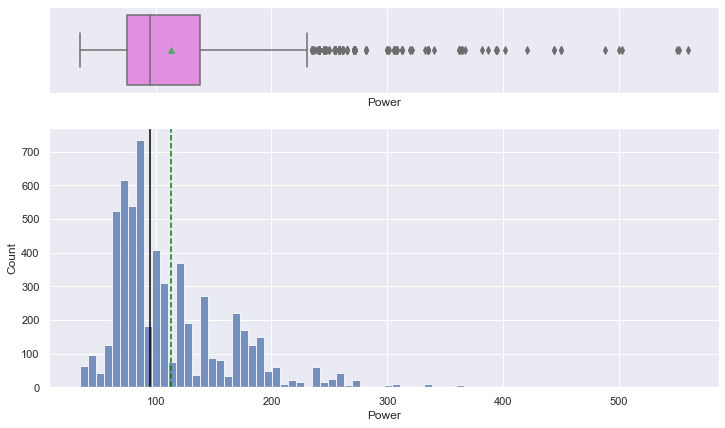

<IPython.core.display.Javascript object>

In [49]:
## Observation on Power

histogram_boxplot(data, "Power")

* This data is skewed to the right
* Similarly to Engine, Exotic cars and Bigger cars have higher Power

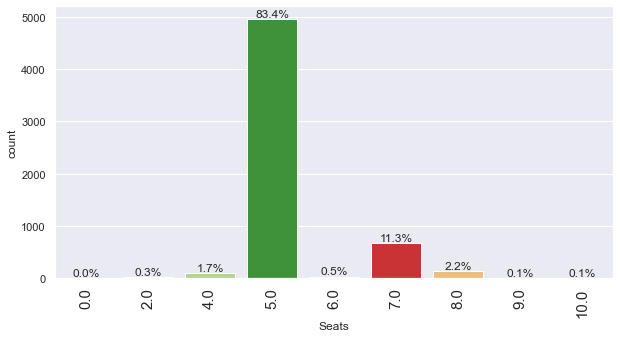

<IPython.core.display.Javascript object>

In [50]:
## Observation on Seats

labeled_barplot(data, "Seats", perc=True)

* It is impossible for a car to have no seats. This is an outlier
* Most cars sold have 5 seats

In [51]:
## Drop Car without seat

data.drop(data[data.Seats == data.Seats.min()].index, inplace=True)

print('The dataset is free of cars without seats')

The dataset is free of cars without seats


<IPython.core.display.Javascript object>

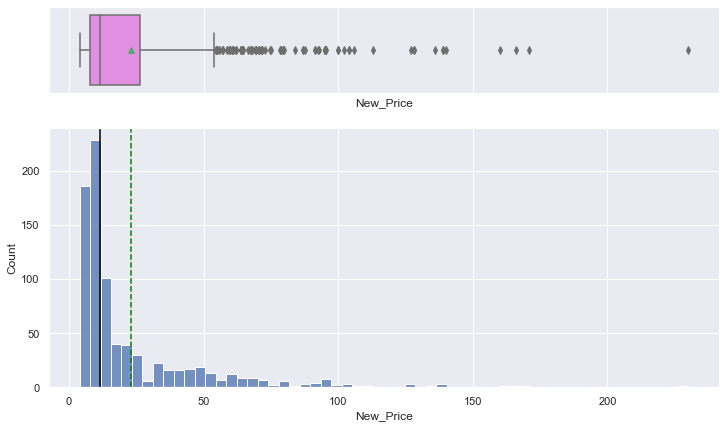

<IPython.core.display.Javascript object>

In [52]:
## Observation on New Price

histogram_boxplot(data, "New_Price")

* This Data is very right-skewed and also contains many missing values as already established

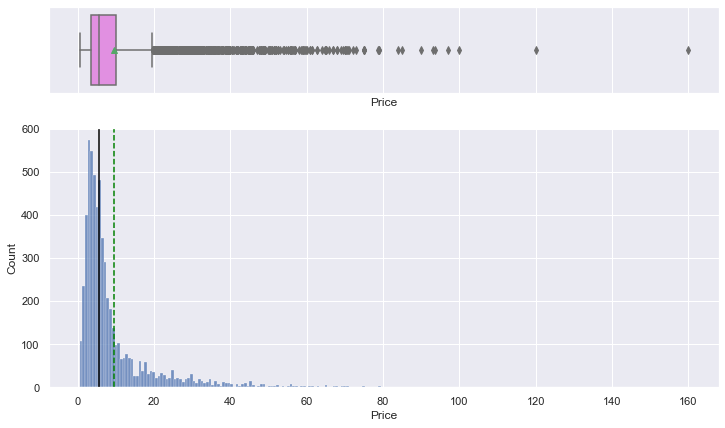

<IPython.core.display.Javascript object>

In [53]:
## Observation on Price (Target Variable)

histogram_boxplot(data, "Price")

* The data is skewed to the right
* This is assumed because the prices are from varying unrelated independent variables

### Bivariate Analysis

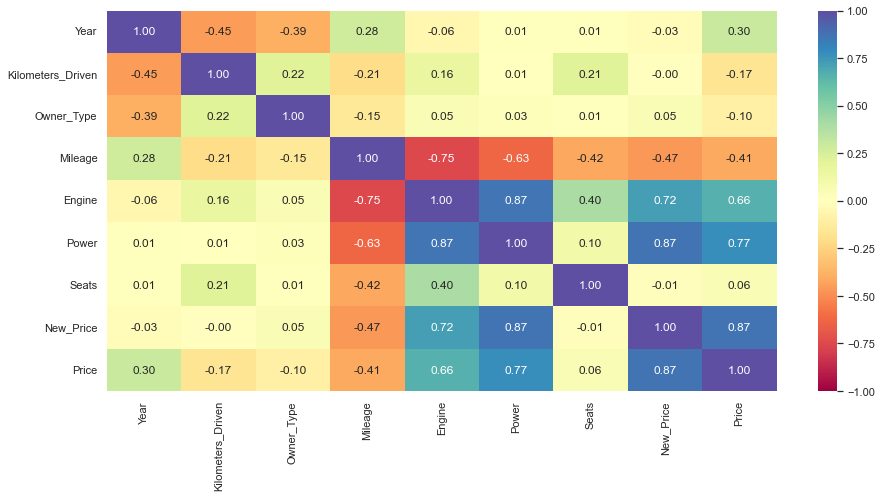

<IPython.core.display.Javascript object>

In [54]:
## Observation of the Correlation

plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Mileage is highly corellated with Engine and Power
* New_Price is highly correlated with Price
* Price is highly corellated with Engine and Power

### Variation in Price with some of the categorical columns in our data

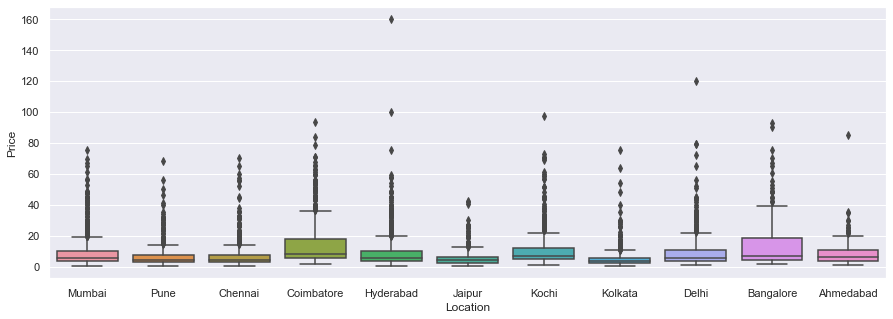

<IPython.core.display.Javascript object>

In [55]:
## Location vs Price

plt.figure(figsize=(15, 5))
sns.boxplot(x="Location", y="Price", data=data)
plt.show()

* Cars with higher prices are found in Coimbatore and Banglore
* The highest priced car is found in Hyderabad

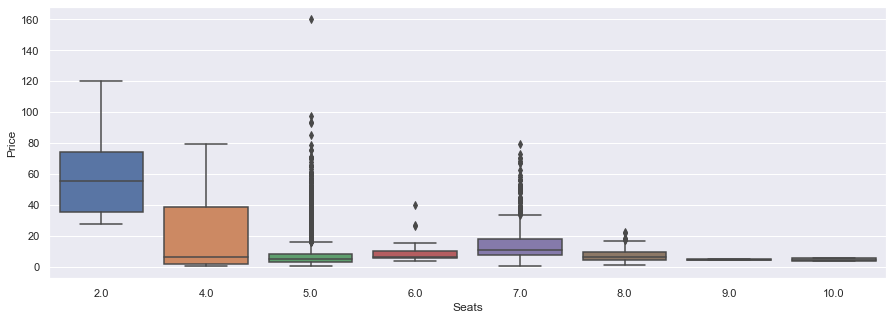

<IPython.core.display.Javascript object>

In [56]:
## Seats vs Price

plt.figure(figsize=(15, 5))
sns.boxplot(x="Seats", y="Price", data=data)
plt.show()

The most Expensive cars have 2 seats

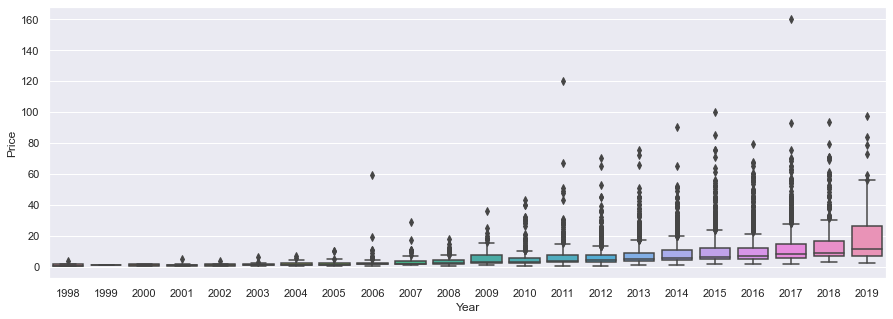

<IPython.core.display.Javascript object>

In [57]:
## Year vs Price

plt.figure(figsize=(15, 5))
sns.boxplot(x="Year", y="Price", data=data)
plt.show()

As expected, the car prices increases as the year increases

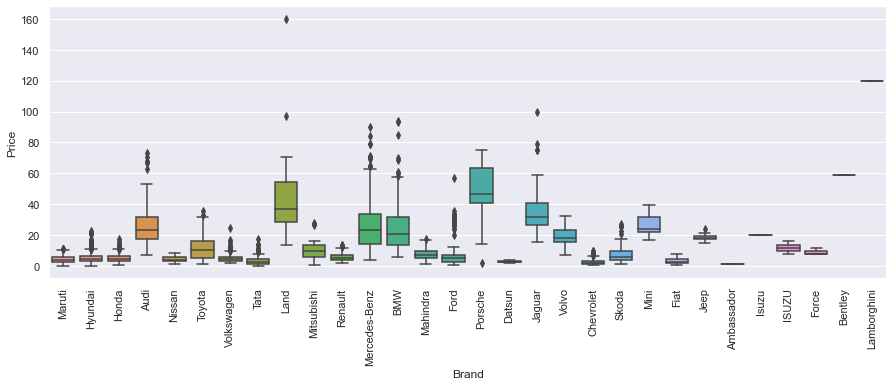

<IPython.core.display.Javascript object>

In [58]:
## Brand vs Price

plt.figure(figsize=(15, 5))
sns.boxplot(x="Brand", y="Price", data=data)
plt.xticks(rotation=90)
plt.show()

* Lamborghini and Bentley have the most Expensive Cars
* Land Rover (Land) has an extreme Data point that might be dropped

In [59]:
## Data frame with Maximum value for Land Rover

data[data.Brand == 'Land'][data.Price == data.Price.max()]

C:\Users\SMATDA~1\AppData\Local\Temp/ipykernel_9484/1011109113.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.Brand == 'Land'][data.Price == data.Price.max()]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
S.No.,,,,,,,,,,,,,,
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,1,15.682353,2993.0,255.0,5.0,230.0,160.0,Land


<IPython.core.display.Javascript object>

By examining the dataframe, It can be concluded that the outlier point for Land Rover is reasonable based on its
* Year of Production - 2017
* New Price - 230
* Price - 160
* Relatively Low kilometers Driven

This signifies that the value of the car had not really depreciated over the years

### Final Data Processing before Modelling

Based on the Data Description, Univariate & Bivariate Analysis, and EDA, the following will be done to the data

* Recategorisation of Multi-Valued categorical Features
* Dropping of Features based on Multicolinearity
* Missing value imputation
* Log Transformation of Skewed Column

In [60]:
## Evaluation of Pattern of Missingness

data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 25
Power                 103
Seats                  30
New_Price            5128
Price                   0
Brand                   0
dtype: int64

<IPython.core.display.Javascript object>

* It is not yet clear if there is a pattern in Missingness
* Most of the values in New_price are missing. Column will be dropped

In [61]:
# counting the number of missing values per row
data.isnull().sum(axis=1).value_counts()

1    5024
0     819
2      75
4      25
3       4
dtype: int64

<IPython.core.display.Javascript object>

In [62]:
# New_Price will be dropped

data.drop(['New_Price'], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [63]:
# most rows don't have missing values now
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    5843
1      75
3      25
2       4
dtype: int64

<IPython.core.display.Javascript object>

In [64]:
# Checking rows that have exactly 2 missing values
data[num_missing == 2].sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
S.No.,,,,,,,,,,,,,
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,2,25.827815,1061.0,NaN,NaN,1.75,Maruti


<IPython.core.display.Javascript object>

One row is responsible for the missingness of 2

In [65]:
# Checking rows that have exactly 1 missing value
data[num_missing == 1].sample(n=5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
S.No.,,,,,,,,,,,,,
4714,Mercedes-Benz E-Class 220 CDI,Ahmedabad,2011,78000,Diesel,Manual,2,17.647059,2148.0,NaN,5.0,14.50,Mercedes-Benz
934,Toyota Etios GD,Kolkata,2012,60000,Diesel,Manual,1,27.752941,1364.0,NaN,5.0,2.95,Toyota
2164,Maruti Swift VDI BSIV W ABS,Hyderabad,2010,86514,Diesel,Manual,1,20.941176,1248.0,NaN,5.0,4.25,Maruti
386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,1,22.516556,1086.0,NaN,5.0,1.95,Hyundai
2497,Maruti Swift VDI BSIV,Hyderabad,2013,68800,Diesel,Manual,1,20.941176,1248.0,NaN,5.0,5.00,Maruti


<IPython.core.display.Javascript object>

Only Power requires Missing value imputation in this scenario

In [66]:
# Checking rows that have exactly 3 missing value
data[num_missing == 3].sample(n=5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
S.No.,,,,,,,,,,,,,
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,4,21.324503,NaN,NaN,NaN,2.35,Maruti
2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,1,21.324503,NaN,NaN,NaN,4.24,Maruti
4577,BMW 5 Series 520d Sedan,Delhi,2012,72000,Diesel,Automatic,3,21.741176,NaN,NaN,NaN,13.85,BMW
2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,1,21.741176,NaN,NaN,NaN,17.89,BMW
3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,1,18.543046,NaN,NaN,NaN,11.99,Honda


<IPython.core.display.Javascript object>

Only Power, Engine and Seats are responsible for the missingness

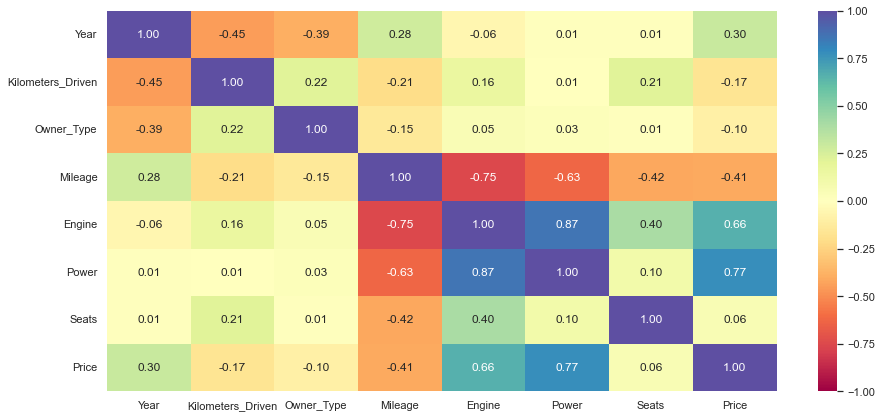

<IPython.core.display.Javascript object>

In [67]:
## Observation of the Correlation for purpose of evaluating potential replacememts for missingness

plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Since Engine and Power are already showing signs of missingness ad have high correlation, they will be safely dropped

In [68]:
# Drop corelated columns
data.drop(['Engine', 'Power'], axis = 1, inplace=True)

<IPython.core.display.Javascript object>

The car name will be used to fiill in the missing seats using the median value.
If there are any missing value after this, it will be filled using the car brand

In [69]:
## Filling Missingness first using the Car Name (More Accurate but Slower)
## Finally using Brand (Less accurate but Faster)
# Extraction of Cars without record for the seats
print('Cars with Missing Seats are:', data['Name'][data.Seats.isnull()].unique())
print('\n')
print('Cars with Missing Seats are:', data['Brand'][data.Seats.isnull()].unique())

Cars with Missing Seats are: ['Maruti Swift 1.3 VXi' 'Honda City 1.3 DX' 'Maruti Swift 1.3 ZXI'
 'Honda City 1.5 EXI' 'Maruti Swift 1.3 LXI' 'Toyota Etios Liva V'
 'Maruti Swift 1.3 VXI ABS' 'Maruti Estilo LXI' 'BMW 5 Series 520d Sedan'
 'Maruti Wagon R Vx' 'Ford Endeavour Hurricane LE'
 'Honda CR-V AT With Sun Roof' 'Fiat Punto 1.3 Emotion'
 'Hyundai Santro Xing XG' 'Honda Jazz Select Edition'
 'Fiat Punto 1.2 Dynamic' 'Fiat Punto 1.4 Emotion']


Cars with Missing Seats are: ['Maruti' 'Honda' 'Toyota' 'BMW' 'Ford' 'Fiat' 'Hyundai']


<IPython.core.display.Javascript object>

In [70]:
# Due to the number, the missing rows are dropped

data.dropna(subset=['Seats'], axis = 0, inplace=True)
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Seats                0
Price                0
Brand                0
dtype: int64

<IPython.core.display.Javascript object>

In [71]:
## Drop name column

data.drop('Name', axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Recategorizing  Categorical Column

It is expected that the mumber of items in categorical vriables will be shrunk

In [72]:
## Pick the Top Brands

top_brand = data.Brand.value_counts().index.tolist()[:19]

def brand_summary(value):
    if sum(np.array(top_brand) == value) > 0:
        return value

    else:
        return 'Others'


data['Brand'] = data['Brand'].apply(brand_summary)

<IPython.core.display.Javascript object>

In [73]:
data.Brand.value_counts()

Maruti           1196
Hyundai          1073
Honda             601
Toyota            407
Volkswagen        314
Mercedes-Benz     306
Ford              298
Mahindra          269
BMW               261
Audi              234
Tata              186
Skoda             171
Renault           145
Chevrolet         121
Others            100
Nissan             91
Land               51
Jaguar             40
Mitsubishi         27
Mini               26
Name: Brand, dtype: int64

<IPython.core.display.Javascript object>

In [74]:
## Pick the Top Fuel_Type and make the 3rd one Others

top_Fuel_Type = data.Fuel_Type.value_counts().index.tolist()[:4]

def brand_summary(value):
    if sum(np.array(top_Fuel_Type) == value) > 0:
        return value

    else:
        return 'Others'


data['Fuel_Type'] = data['Fuel_Type'].apply(brand_summary)

<IPython.core.display.Javascript object>

In [75]:
data.Fuel_Type.value_counts()

Diesel    3170
Petrol    2681
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

<IPython.core.display.Javascript object>

In [76]:
## Convert Column type to Logarithmic

cols_to_log = ['Kilometers_Driven']

for colname in cols_to_log:
    data[colname + '_log'] = np.log(data[colname] + 1)
data.drop(cols_to_log, axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5917 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5917 non-null   object 
 1   Year                   5917 non-null   int64  
 2   Fuel_Type              5917 non-null   object 
 3   Transmission           5917 non-null   object 
 4   Owner_Type             5917 non-null   int64  
 5   Mileage                5917 non-null   float64
 6   Seats                  5917 non-null   float64
 7   Price                  5917 non-null   float64
 8   Brand                  5917 non-null   object 
 9   Kilometers_Driven_log  5917 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 508.5+ KB


<IPython.core.display.Javascript object>

## Model Building

In [78]:
# Define independent and dependent variables
X = data.drop(["Price"], axis=1)
y = data["Price"]

<IPython.core.display.Javascript object>

In [79]:
# Creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,Year,Owner_Type,Mileage,Seats,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Others,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010,1,26.600000,5.0,11.184435,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2015,1,23.141176,5.0,10.621352,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,1,24.105960,5.0,10.736418,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,1,24.435294,7.0,11.373675,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2013,2,17.882353,5.0,10.613271,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [80]:
print('After creating dummy variables, new data shape is:', X.shape)

After creating dummy variables, new data shape is: (5917, 38)


<IPython.core.display.Javascript object>

In [81]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [82]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4141
Number of rows in test data = 1776


<IPython.core.display.Javascript object>

In [83]:
# Fitting a linear Model

lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [84]:
# check the coefficients and intercept of the model, which are the parameters we learned.

coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.sort_values(by = "Coefficients")

,Coefficients
Intercept,-1922.698239
Brand_Tata,-15.028081
Brand_Mahindra,-14.726410
Brand_Volkswagen,-14.251609
Brand_Renault,-13.918310
Brand_Chevrolet,-13.516497
Brand_Nissan,-13.402103
Brand_Ford,-12.930299
Brand_Hyundai,-12.649910
Brand_Skoda,-12.546490


<IPython.core.display.Javascript object>

### Coefficient Interpretations

* Coefficients of *mileage*, *seats*, some the *brand* columns, some of the *Fuel_Type* columns, etc. are negative.
    - Increase in these will lead to a decrease in the Price.


* Coefficients of some of the *brand* columns, some the *Fuel Type* columns are positive.
    - Increase in these will lead to an increase in the Price.

### Model Performance Check

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function that will print out all the above metrics in one go.

In [85]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [86]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.191888,3.389067,0.69779,0.694991,59.481861


<IPython.core.display.Javascript object>

In [87]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.20065,3.456148,0.671931,0.664754,62.399407


<IPython.core.display.Javascript object>

**Observations**

- The train and test $R^2$ are 0.69 and 0.67, indicating that the model explains 69% and 67% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict Price within a mean error of 3.46

- MAPE of 66.48 on the test data means that we are able to predict within 66.5% of the Price.

- However, the overall performance is moderate.

### Forward Feature Selection using *SequentialFeatureSelector*

In [88]:
# Mixtend Installer
!pip install mlxtend

<IPython.core.display.Javascript object>

In [89]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    6.6s finished

[2021-11-22 07:07:06] Features: 1/38 -- score: 0.3449309811957274[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.2s finished

[2021-11-22 07:07:06] Features: 2/38 -- score: 0.40572364198136945[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.2s finished

[2021-11-22 07:07:06] Features: 3/38 -- score: 0.5007237585911395[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished

[2021-11-22 07:07:07] Features: 4/38 -- score: 0.5307194555446484[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.2s finished


<IPython.core.display.Javascript object>

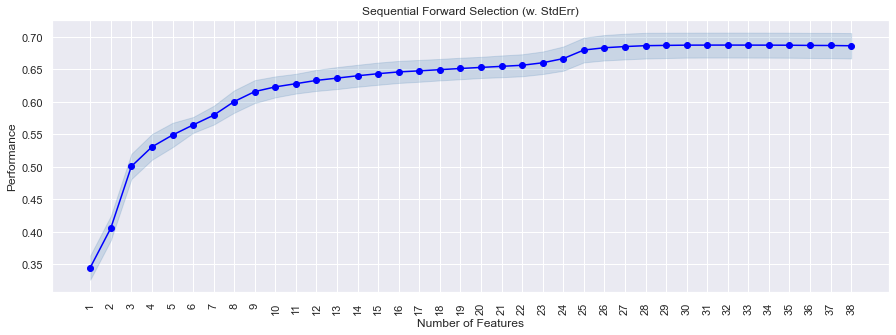

<IPython.core.display.Javascript object>

In [90]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

**Observaion**

* We can see that performance increases till the 27th feature and then slowly becomes constant.
* The decision to choose the k_features now depends on the adjusted $R^2$ vs the complexity of the model.
* The increase in adjusted $R^2$ is not very significant as we are getting the same values with a less complex model.
* So we'll use 27 features only to build our model.
- Number of features chosen will also depend on the business context and use case of the model.

In [91]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=27,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.1s finished

[2021-11-22 07:07:20] Features: 1/27 -- score: 0.3449309811957274[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.1s finished

[2021-11-22 07:07:20] Features: 2/27 -- score: 0.40572364198136945[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.1s finished

[2021-11-22 07:07:20] Features: 3/27 -- score: 0.5007237585911395[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished

[2021-11-22 07:07:20] Features: 4/27 -- score: 0.5307194555446484[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.1s finished


<IPython.core.display.Javascript object>

In [92]:
# let us select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 2, 3, 4, 7, 12, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


<IPython.core.display.Javascript object>

In [93]:
# let us look at the names of the important features
x_train.columns[feat_cols]

Index(['Year', 'Mileage', 'Seats', 'Kilometers_Driven_log',
       'Location_Coimbatore', 'Location_Kolkata', 'Fuel_Type_Diesel',
       'Transmission_Manual', 'Brand_BMW', 'Brand_Chevrolet', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_Jaguar', 'Brand_Land',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Others', 'Brand_Renault',
       'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen'],
      dtype='object')

<IPython.core.display.Javascript object>

In [94]:
#Fitting an sklearn model using these features only
x_train_final = x_train[x_train.columns[feat_cols]]

<IPython.core.display.Javascript object>

In [95]:
# Creating new x_test with the same variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

<IPython.core.display.Javascript object>

In [96]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
    index=x_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
print(coef_df)

                       Coefficients
Year                       0.985033
Mileage                   -0.671690
Seats                     -0.600448
Kilometers_Driven_log     -1.651345
Location_Coimbatore        1.807817
Location_Kolkata          -1.733140
Fuel_Type_Diesel           3.437037
Transmission_Manual       -2.073617
Brand_BMW                  1.024758
Brand_Chevrolet          -13.656999
Brand_Ford               -12.908047
Brand_Honda              -12.038832
Brand_Hyundai            -12.737014
Brand_Jaguar               8.688426
Brand_Land                13.005386
Brand_Mahindra           -14.862324
Brand_Maruti             -11.656330
Brand_Mercedes-Benz        0.686285
Brand_Mini                 2.631493
Brand_Mitsubishi         -11.523126
Brand_Nissan             -13.544408
Brand_Others              -2.941179
Brand_Renault            -13.985918
Brand_Skoda              -12.786800
Brand_Tata               -15.094916
Brand_Toyota             -10.650376
Brand_Volkswagen         -14

<IPython.core.display.Javascript object>

In [97]:
# model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(
    lin_reg_model2, x_train_final, y_train
)
lin_reg_model2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.228589,3.413977,0.694197,0.69219,59.380126


<IPython.core.display.Javascript object>

In [98]:
# model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
    lin_reg_model2, x_test_final, y_test
)
lin_reg_model2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.260702,3.498771,0.665546,0.66038,62.797889


<IPython.core.display.Javascript object>

In [99]:
# Comparing the two models built

# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,6.191888,6.228589
MAE,3.389067,3.413977
R-squared,0.697790,0.694197
Adj. R-squared,0.694991,0.692190
MAPE,59.481861,59.380126


<IPython.core.display.Javascript object>

In [100]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,6.200650,6.260702
MAE,3.456148,3.498771
R-squared,0.671931,0.665546
Adj. R-squared,0.664754,0.660380
MAPE,62.399407,62.797889


<IPython.core.display.Javascript object>

**Observation**

* The new model (*lin_reg_model2*) uses less than half the number of features as the previous model (*lin_reg_model*).
* The performance of the new model, however, is close to our previous model.
* Depending upon time sensitivity and storage restrictions, we can choose between the models.
* **We will be moving forward with *lin_reg_model* as it shows better performance.**

### Conclusion

- We have been able to build a predictive model that can be used to predict the price of used cars with an $R^2$ of 0.69 on the training set.


- Analysts can use this model to predict the Price within a mean error of 3.5


- We found that the number of seats, some of the car brands, and some locations are some of the factors which tend to decrease the Price of used cars.

- We can also explore improving the linear model by applying non-linear transformations to some of the attributes. This might help us better identify the patterns in the data to predict the anime ratings more accurately.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a451429-b483-4d37-b90b-6d85cd95ec1d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>